# TMA4320 Introduksjon til vitenskapelige beregninger - 24.05.2019 

## Cholesky-algoritmen

I denne oppgaven skal du implementere Cholesky-algoritmen for å løse symmetriske positiv definitte (SPD) lineære ligningssystemer. Algoritmen består av tre deler
1. Choleskyfaktorisering: La $A\in\mathbb{R}^{n\times n}$ være SPD. Finn nedretriangulær matrise $L$ slik at $A=LL^T$
2. Foroversubstitusjon: For nedretriangulær matrise $L$ og gitt vektor $b$, finn $c$ slik at $Lc=b$
3. Bakoversubstitusjon: For nedretriangulær matrise $L$ og gitt vektor $c$, finn $x$ slik at $L^Tx=c$

Det antas at alle matriser og vektorer er representert som numpy arrays. For ordens skyld: Du skal ikke bruke noen form for pivotering i denne oppgaven. *Merk at formler som brukes i Cholesky-faktorisering står i det vedlagte formelarket. Husk også at du har tilgang på manual for numpy og matplotlib om du trenger.*

**Oppgave**


**(a)** Lag en funksjon $\texttt{cholesky}$ som utfører selve faktoriseringen, dvs finner den nedretriangulære $L$.

*Svaret ditt på denne oppgaven er koden $\texttt{cholesky}$ samt verifiseringen på 3x3 eksemplet nedenfor *

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def cholesky(A):
    ''' A er en positiv definitt matrise som returnerer en nedretriangulær matrise L slik at A=L L^T
    '''
    n, m = A.shape
    L = np.zeros((n,m))
    for k in range(n):
        for j in range(k):
            L[k,j] = (A[k, j] - L[k,:j] @ L[j,:j])/L[j,j]
        L[k,k] = (A[k,k] - L[k,:k]@L[k,:k])**(1/2)
    return L
    

**(b)** Skriv en funksjon, $\texttt{substit}$ som utfører punkt 2 og 3 beskrevet ovenfor, dvs forover- og bakoversubstitusjon gjøres i den samme python-funksjonen.

*Svaret ditt på denne oppgaven er koden samt verifiseringen på 3x3 eksemplet nedenfor*

In [60]:
def substit(L,b):
    '''For en nedretriangulær matrise L (nxn) og en vektor b (nx1) finn først c (nx1) slik at Lc=b
    og deretter x (nx1) slik at L^Tx=c'''
    n, m = L.shape
    nb = len(b)
    assert(n == nb) #Verify that the dimensioans are correct
    
    #Find c first
    c = np.zeros(n)
    c[0] = b[0]/L[0,0]
    for i in range(1,n):
        c[i] = (b[i]-L[i,:i] @ c[:i])/L[i,i]
    
    #Find x afterwards
    x = np.zeros(n)
    x[-1] = c[-1]/L[-1,-1]
    for i in range(n-2,-1,-1):
        x[i] = (c[i] - L[i+1:,i] @ x[i+1:])/L[i,i]
    return x


Du verifiserer koden din på å løse $Ax=b$ mhp $x$ ved å la den sjekke at med

$$
   A = \left[ 
   \begin{array}{rrr}
    1  &   2  &   3 \\
     2  &   5  &   4   \\
     3  &   4  &  14
   \end{array}
   \right]\quad\text{og}
   \quad
   b=\left[\begin{array}{r} -2\\ -8 \\ 3 \end{array}\right]\quad\text{blir}\quad
    L = \left[ 
   \begin{array}{rrr}
    1  &   0  &   0 \\
     2  &   1  &   0   \\
     3  &   -2  &  1
   \end{array}
   \right]\qquad\text{og}\quad
    x=\left[\begin{array}{r} -1\\ -2 \\ 1 \end{array}\right]
$$

Fyll inn kall til dine funksjoner i følgende kodecelle der du beregner $L$ og $x$

In [40]:
# Verifikasjon oppgave a og b
A=np.array([[1,2,3],[2,5,4],[3,4,14]])
b = np.array([-2,-8,3])

# Kall dine funksjoner cholesky og substit her
L = cholesky(A)
x = substit(L, b)
# Skriv ut L og x, (fjern # eller modifiser flg 2 linjer)
print('L=',L)
print('x=',x)




L= [[ 1.  0.  0.]
 [ 2.  1.  0.]
 [ 3. -2.  1.]]
x= [-1. -2.  1.]


**(c)** Her skal du teste ut implementasjonen ved å anvende den på et ordentlig eksempel. 
Et varmeledningsproblem i 2D diskretiseres, og man ender opp med følgende delproblem:
Gitt $n$ gridceller i hver retning ($x$ og $y$), og
gitt temperaturfordeling $U^0\in\mathbb{R}^{n^2}$ ved tid $t=0$. For $k=1, 2, \ldots$ finn temperaturfordeling for tid $t=t_k$, som en vektor $U^k\in\mathbb{R}^{n^2}$ ved repetitivt å løse ligningen

$$
     M U^{k+1} = U^k,\quad k=0,1,\ldots
$$

$M$ er SPD (tas som gitt) og avhenger av en tidsskrittlengde $\Delta t$ og heltallet $n$. Man har da $M\in \mathbb{R}^{n^2\times n^2}$.

Bruk din Choleskyimplementasjon til å beregne $U^1, U^2$ og $U^3$ der du setter $n=50$ og $\Delta t = 0.01$.
Nedenfor fins det tre funksjoner som du kan gjøre bruk av uten videre. Disse er 

* genM(n,Delta_t) som returnerer matrisen $M$ du skal bruke
* genU0(n) som returnerer $U^0$
* surfplot(U) som for en løsning $U$ lager et plott av løsningen av varmeledningsproblemet, den viser temperaturfordeling som en flate i $(x,y)$-planet.

*Svaret på oppgaven er koden du lager for å finne $U^1, U^2, U^3$ samt plott av $U^0$ og $U^3$ funnet ved å kalle
den oppgitte funksjonen surfplot*


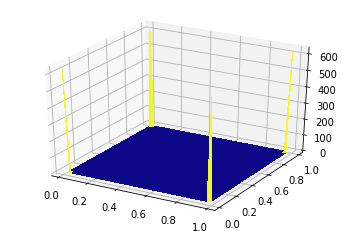

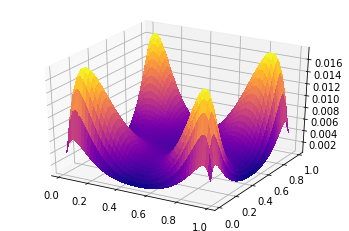

In [63]:
# Her skriver du kode for å løse oppgave c
#
#  1. Hent U0 og beregn U1, U2, U3 ved bruk av dine cholesky- og substitfunksjoner
#  2. Plott U0 og U3 med surfplot-funksjonen
n = 50
Delta_t = 0.01

U0 = genU0(n)
M = genM(n, Delta_t)

L = cholesky(M)
U1 = substit(L, U0)
U2 = substit(L, U1)
U3 = substit(L, U2)
surfplot(U0)
surfplot(U3)

** SUPPLERTE FUNKSJONER **

In [62]:
def genM(n,Delta_t):
    Delta_x = 1./(n+1)
    r=Delta_t/Delta_x**2
    ee=np.ones((n,))
    B=(1+4*r)*np.diag(ee)-r*np.diag(ee[1:],-1)-r*np.diag(ee[1:],1)
    In=np.diag(ee)
    Fn=np.diag(ee[1:],1)
    Gn=np.diag(ee[1:],-1)
    M=np.kron(In,B)-r*np.kron(Fn,In)-r*np.kron(Gn,In)
    return M


def genU0(n):
    p=n**2/4
    Z0=np.zeros((n,n))
    Z0[n-1,0]=p
    Z0[0,n-1]=p
    Z0[0,0] = p
    Z0[n-1,n-1]=p
    U0 = np.reshape(Z0,(n**2,1))
    return U0

def surfplot(U):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    n2=U.shape[0]
    n=int(np.sqrt(n2))
    if n2 != n**2:
        print('Antall elementer i U må være et kvadrattall\n')
        return
    Delta_x=1/(n+1)
    xx=np.linspace(Delta_x,1-Delta_x,n)
    yy=np.linspace(Delta_x,1-Delta_x,n)
    X,Y = np.meshgrid(xx,yy)
    Z = np.reshape(U,(n,n))
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=False)
    plt.show()
    return surf
